In [20]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [21]:
BitonicTKMPIRandom = th.Thicket.from_caliperreader(glob('dataFiles/MPI/Bitonic/random/*.cali'))
BitonicTKMPISorted = th.Thicket.from_caliperreader(glob('dataFiles/MPI/Bitonic/sorted/*.cali'))
BitonicTKMPIReverse = th.Thicket.from_caliperreader(glob('dataFiles/MPI/Bitonic/reverse/*.cali'))
BitonicTKMPIPerturbed = th.Thicket.from_caliperreader(glob('dataFiles/MPI/Bitonic/perturbed/*.cali'))

BitonicTKCUDARandom = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/Bitonic/random/*.cali'))
BitonicTKCUDASorted = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/Bitonic/sorted/*.cali'))
BitonicTKCUDAReverse = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/Bitonic/reverse/*.cali'))
BitonicTKCUDAPerturbed = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/Bitonic/perturbed/*.cali'))

In [34]:
BitonicTKCUDASorted.metadata

cali.caliper.version  \
profile                           
57234133                 2.10.0   
480423652                2.10.0   
516381100                2.10.0   
676185771                2.10.0   
729034450                2.10.0   
821622682                2.10.0   
849597604                2.10.0   
900120094                2.10.0   
983841413                2.10.0   
1095265939               2.10.0   
1167423309               2.10.0   
1168315946               2.10.0   
1218321330               2.10.0   
1325852799               2.10.0   
1361319784               2.10.0   
1430982235               2.10.0   
1457915656               2.10.0   
1508510066               2.10.0   
1836769617               2.10.0   
1893167062               2.10.0   
1977486822               2.10.0   
2154202428               2.10.0   
2233546563               2.10.0   
2344805445               2.10.0   
2969289280               2.10.0   
3062823497               2.10.0   
3129262586               2.10.0   
3139155037               2.10.0   
3140148149               2.10.0   
3507889068               2.10.0   
3591430045               2.10.0   
3798187310               2.10.0   
3956329576               2.10.0   
4047325504               2.10.0   
4250159470               2.10.0   

                                                 spot.metrics  \
profile                                                         
57234133    min#inclusive#sum#time.duration,max#inclusive#...   
480423652   min#inclusive#sum#time.duration,max#inclusive#...   
516381100   min#inclusive#sum#time.duration,max#inclusive#...   
676185771   min#inclusive#sum#time.duration,max#inclusive#...   
729034450   min#inclusive#sum#time.duration,max#inclusive#...   
821622682   min#inclusive#sum#time.duration,max#inclusive#...   
849597604   min#inclusive#sum#time.duration,max#inclusive#...   
900120094   min#inclusive#sum#time.duration,max#inclusive#...   
983841413   min#inclusive#sum#time.duration,max#inclusive#...   
1095265939  min#inclusive#sum#time.duration,max#inclusive#...   
1167423309  min#inclusive#sum#time.duration,max#inclusive#...   
1168315946  min#inclusive#sum#time.duration,max#inclusive#...   
1218321330  min#inclusive#sum#time.duration,max#inclusive#...   
1325852799  min#inclusive#sum#time.duration,max#inclusive#...   
1361319784  min#inclusive#sum#time.duration,max#inclusive#...   
1430982235  min#inclusive#sum#time.duration,max#inclusive#...   
1457915656  min#inclusive#sum#time.duration,max#inclusive#...   
1508510066  min#inclusive#sum#time.duration,max#inclusive#...   
1836769617  min#inclusive#sum#time.duration,max#inclusive#...   
1893167062  min#inclusive#sum#time.duration,max#inclusive#...   
1977486822  min#inclusive#sum#time.duration,max#inclusive#...   
2154202428  min#inclusive#sum#time.duration,max#inclusive#...   
2233546563  min#inclusive#sum#time.duration,max#inclusive#...   
2344805445  min#inclusive#sum#time.duration,max#inclusive#...   
2969289280  min#inclusive#sum#time.duration,max#inclusive#...   
3062823497  min#inclusive#sum#time.duration,max#inclusive#...   
3129262586  min#inclusive#sum#time.duration,max#inclusive#...   
3139155037  min#inclusive#sum#time.duration,max#inclusive#...   
3140148149  min#inclusive#sum#time.duration,max#inclusive#...   
3507889068  min#inclusive#sum#time.duration,max#inclusive#...   
3591430045  min#inclusive#sum#time.duration,max#inclusive#...   
3798187310  min#inclusive#sum#time.duration,max#inclusive#...   
3956329576  min#inclusive#sum#time.duration,max#inclusive#...   
4047325504  min#inclusive#sum#time.duration,max#inclusive#...   
4250159470  min#inclusive#sum#time.duration,max#inclusive#...   

           spot.timeseries.metrics  spot.format.version spot.options  \
profile                                                                
57234133                                              2   node.order   
480423652                                             2   node.order   
516381100            

Clean up the Bitonic data

In [23]:
BitonicMPIData = [BitonicTKMPIRandom, BitonicTKMPISorted, BitonicTKMPIReverse, BitonicTKMPIPerturbed]
BitonicMPIDataClean = []

for i in range(len(BitonicMPIData)):
    BitonicGB = BitonicMPIData[i].groupby("InputSize")

    BitonicCtk = th.Thicket.concat_thickets(
        thickets=list(BitonicGB.values()),
        headers=list(BitonicGB.keys()),
        axis="columns",
        metadata_key="num_procs"
    )

    remove_list = [("node", "")]
    values = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]
    for val in values:
        remove_list.append((val, "nid"))
        remove_list.append((val, "spot.channel"))
        remove_list.append((val, "Total time"))

    BitonicCtk.dataframe = BitonicCtk.dataframe.reset_index().drop(remove_list, axis=1)
    BitonicMPIDataClean.append(BitonicCtk)

BitonicCUDAData = [BitonicTKCUDARandom, BitonicTKCUDASorted, BitonicTKCUDAReverse, BitonicTKCUDAPerturbed]
BitonicCUDADataClean = []

for i in range(len(BitonicCUDAData)):
    BitonicGB = BitonicCUDAData[i].groupby("InputSize")

    BitonicCtk = th.Thicket.concat_thickets(
        thickets=list(BitonicGB.values()),
        headers=list(BitonicGB.keys()),
        axis="columns",
        metadata_key="num_procs"
    )

    remove_list = [("node", "")]
    values = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]
    for val in values:
        remove_list.append((val, "nid"))
        remove_list.append((val, "spot.channel"))
        remove_list.append((val, "Total time"))

    BitonicCtk.dataframe = BitonicCtk.dataframe.reset_index().drop(remove_list, axis=1)
    BitonicCUDADataClean.append(BitonicCtk)

7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x140e31190>, 262144: <thicket.thicket.Thicket object at 0x17eeaa2a0>, 1048576: <thicket.thicket.Thicket object at 0x282771010>, 4194304: <thicket.thicket.Thicket object at 0x282773ad0>, 16777216: <thicket.thicket.Thicket object at 0x282773350>, 67108864: <thicket.thicket.Thicket object at 0x2827715e0>, 268435456: <thicket.thicket.Thicket object at 0x28261c800>}
7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x17f970f20>, 262144: <thicket.thicket.Thicket object at 0x17fa0ddc0>, 1048576: <thicket.thicket.Thicket object at 0x17f111340>, 4194304: <thicket.thicket.Thicket object at 0x17f21dcd0>, 16777216: <thicket.thicket.Thicket object at 0x17f21dee0>, 67108864: <thicket.thicket.Thicket object at 0x2827712b0>, 268435456: <thicket.thicket.Thicket object at 0x28261fda0>}
7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x28266d1f0>, 262144: <thicket.thicket.Thicket object at 0x28266c1a0>, 1

Collect desired regions for plotting

In [24]:
# Data for main
BitonicMPIRandomMain = BitonicMPIDataClean[0].dataframe.loc[BitonicMPIDataClean[0].dataframe['name'] == 'main']
BitonicMPISortedMain = BitonicMPIDataClean[1].dataframe.loc[BitonicMPIDataClean[1].dataframe['name'] == 'main']
BitonicMPIReverseMain = BitonicMPIDataClean[2].dataframe.loc[BitonicMPIDataClean[2].dataframe['name'] == 'main']
BitonicMPIPerturbedMain = BitonicMPIDataClean[3].dataframe.loc[ BitonicMPIDataClean[3].dataframe['name'] == 'main']

# Data for comm
BitonicMPIRandomComm = BitonicMPIDataClean[0].dataframe.loc[BitonicMPIDataClean[0].dataframe['name'] == 'comm']
BitonicMPISortedComm = BitonicMPIDataClean[1].dataframe.loc[BitonicMPIDataClean[1].dataframe['name'] == 'comm']
BitonicMPIReverseComm = BitonicMPIDataClean[2].dataframe.loc[BitonicMPIDataClean[2].dataframe['name'] == 'comm']
BitonicMPIPerturbedComm = BitonicMPIDataClean[3].dataframe.loc[ BitonicMPIDataClean[3].dataframe['name'] == 'comm']

# Data for comp
BitonicMPIRandomComp = BitonicMPIDataClean[0].dataframe.loc[BitonicMPIDataClean[0].dataframe['name'] == 'comp_large']
BitonicMPISortedComp = BitonicMPIDataClean[1].dataframe.loc[BitonicMPIDataClean[1].dataframe['name'] == 'comp_large']
BitonicMPIReverseComp = BitonicMPIDataClean[2].dataframe.loc[BitonicMPIDataClean[2].dataframe['name'] == 'comp_large']
BitonicMPIPerturbedComp = BitonicMPIDataClean[3].dataframe.loc[BitonicMPIDataClean[3].dataframe['name'] == 'comp_large']

algosMain = {'BitonicMPIRandom': BitonicMPIRandomMain, 'BitonicMPISorted': BitonicMPISortedMain, 'BitonicMPIReverse': BitonicMPIReverseMain,
            'BitonicMPIPerturbed': BitonicMPIPerturbedMain}

algosComm = {'BitonicMPIRandom': BitonicMPIRandomComm, 'BitonicMPISorted': BitonicMPISortedComm, 'BitonicMPIReverse': BitonicMPIReverseComm,
            'BitonicMPIPerturbed': BitonicMPIPerturbedComm}

algosComp = {'BitonicMPIRandom': BitonicMPIRandomComp, 'BitonicMPISorted': BitonicMPISortedComp, 'BitonicMPIReverse': BitonicMPIReverseComp,
            'BitonicMPIPerturbed': BitonicMPIPerturbedComp}

# Data for main
BitonicCUDARandomMain = BitonicCUDADataClean[0].dataframe.loc[BitonicCUDADataClean[0].dataframe['name'] == 'main']
BitonicCUDASortedMain = BitonicCUDADataClean[1].dataframe.loc[BitonicCUDADataClean[1].dataframe['name'] == 'main']
BitonicCUDAReverseMain = BitonicCUDADataClean[2].dataframe.loc[BitonicCUDADataClean[2].dataframe['name'] == 'main']
BitonicCUDAPerturbedMain = BitonicCUDADataClean[3].dataframe.loc[BitonicCUDADataClean[3].dataframe['name'] == 'main']

# Data for comm
BitonicCUDARandomComm = BitonicCUDADataClean[0].dataframe.loc[BitonicCUDADataClean[0].dataframe['name'] == 'comm']
BitonicCUDASortedComm = BitonicCUDADataClean[1].dataframe.loc[BitonicCUDADataClean[1].dataframe['name'] == 'comm']
BitonicCUDAReverseComm = BitonicCUDADataClean[2].dataframe.loc[BitonicCUDADataClean[2].dataframe['name'] == 'comm']
BitonicCUDAPerturbedComm = BitonicCUDADataClean[3].dataframe.loc[BitonicCUDADataClean[3].dataframe['name'] == 'comm']

# Data for comp
BitonicCUDARandomComp = BitonicCUDADataClean[0].dataframe.loc[BitonicCUDADataClean[0].dataframe['name'] == 'comp_large']
BitonicCUDASortedComp = BitonicCUDADataClean[1].dataframe.loc[BitonicCUDADataClean[1].dataframe['name'] == 'comp_large']
BitonicCUDAReverseComp = BitonicCUDADataClean[2].dataframe.loc[BitonicCUDADataClean[2].dataframe['name'] == 'comp_large']
BitonicCUDAPerturbedComp = BitonicCUDADataClean[3].dataframe.loc[BitonicCUDADataClean[3].dataframe['name'] == 'comp_large']

algosMainCUDA = {'BitonicCUDARandom': BitonicCUDARandomMain, 'BitonicCUDASorted': BitonicCUDASortedMain, 'BitonicCUDAReverse': BitonicCUDAReverseMain,
            'BitonicCUDAPerturbed': BitonicCUDAPerturbedMain}

algosCommCUDA = {'BitonicCUDARandom': BitonicCUDARandomComm, 'BitonicCUDASorted': BitonicCUDASortedComm, 'BitonicCUDAReverse': BitonicCUDAReverseComm,
            'BitonicCUDAPerturbed': BitonicCUDAPerturbedComm}

algosCompCUDA = {'BitonicCUDARandom': BitonicCUDARandomComp, 'BitonicCUDASorted': BitonicCUDASortedComp, 'BitonicCUDAReverse': BitonicCUDAReverseComp,
            'BitonicCUDAPerturbed': BitonicCUDAPerturbedComp}

display(BitonicCUDADataClean[0].dataframe)

num_procs         65536                                    262144  \
             Min time/rank Max time/rank Avg time/rank Min time/rank   
0         64      0.000179      0.000179      0.000179      0.000746   
1        128      0.000192      0.000192      0.000192      0.000773   
2        256      0.000182      0.000182      0.000182      0.000770   
3        512      0.000182      0.000182      0.000182      0.000803   
4       1024      0.000181      0.000181      0.000181      0.000908   
5         64      0.000818      0.000818      0.000818      0.003138   
6        128      0.000815      0.000815      0.000815      0.003063   
7        256      0.000810      0.000810      0.000810      0.003229   
8        512      0.000817      0.000817      0.000817      0.003085   
9       1024      0.000865      0.000865      0.000865      0.003188   
10        64      0.314576      0.314576      0.314576      0.328985   
11       128      0.327970      0.327970      0.327970      0.325893   
12       256      0.307202      0.307202      0.307202      0.319444   
13       512      0.322623      0.322623      0.322623      0.586438   
14      1024      0.325309      0.325309      0.325309      0.596840   
15        64      0.000811      0.000811      0.000811      0.001585   
16       128      0.000678      0.000678      0.000678      0.001399   
17       256      0.000657      0.000657      0.000657      0.000901   
18       512      0.000639      0.000639      0.000639      0.001141   
19      1024      0.000763      0.000763      0.000763      0.001194   
20        64      0.000380      0.000380      0.000380      0.000477   
21       128      0.000430      0.000430      0.000430      0.000566   
22       256      0.000362      0.000362      0.000362      0.000514   
23       512      0.000426      0.000426      0.000426      0.000572   
24      1024      0.000386      0.000386      0.000386      0.000504   
25        64      0.000098      0.000098      0.000098      0.000297   
26       128      0.000115      0.000115      0.000115      0.000320   
27       256      0.000102      0.000102      0.000102      0.000306   
28       512      0.000107      0.000107      0.000107      0.000327   
29      1024      0.000096      0.000096      0.000096      0.000307   
30        64      0.000088      0.000088      0.000088      0.000287   
31       128      0.000099      0.000099      0.000099      0.000306   
32       256      0.000092      0.000092      0.000092      0.000293   
33       512      0.000097      0.000097      0.000097      0.000312   
34      1024      0.000088      0.000088      0.000088      0.000294   
35        64      0.000183      0.000183      0.000183      0.000433   
36       128      0.000218      0.000218      0.000218      0.000477   
37       256      0.000181      0.000181      0.000181      0.000430   
38       512      0.000178      0.000178      0.000178      0.000430   
39      1024      0.000199      0.000199      0.000199      0.000428   
40        64      0.000150      0.000150      0.000150      0.000398   
41       128      0.000183      0.000183      0.000183      0.000440   
42       256      0.000148      0.000148      0.000148      0.000396   
43       512      0.000146      0.000146      0.000146      0.000393   
44      1024      0.000167      0.000167      0.000167      0.000393   

                                     1048576                              \
   Max time/rank Avg time/rank Min time/rank Max time/rank Avg time/rank   
0       0.000746      0.000746      0.003051      0.003051      0.003051   
1       0.000773      0.000773      0.002735      0.002735      0.002735   
2       0.000770      0.000770      0.002743      0.002743      0.002743   
3       0.000803      0.000803      0.002745      0.002745      0.002745   
4       0.000908      0.000908      0.002770      0.002770      0.002770   
5       0.003138      0.003138      0.011988      0.011988      0.011988   
6       0.

Plot strong scaling

In [25]:
def plot_strong_scaling(algos, num_vals, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    for k in algos.keys():
        dframe = algos[k]
        xvals = dframe['num_procs']
        yvals = dframe[num_vals][time_type]
        ax.plot(xvals, yvals, label=k)
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

MPI

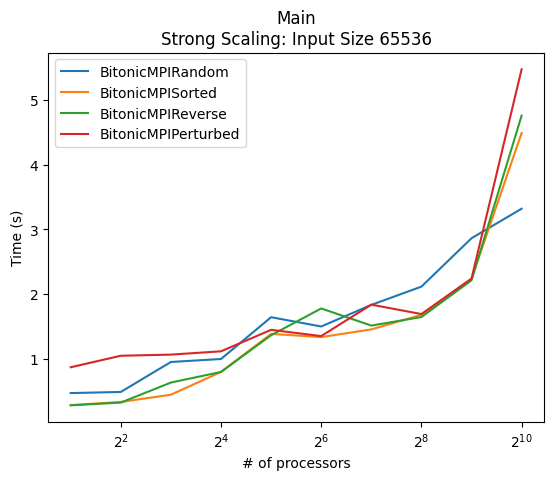

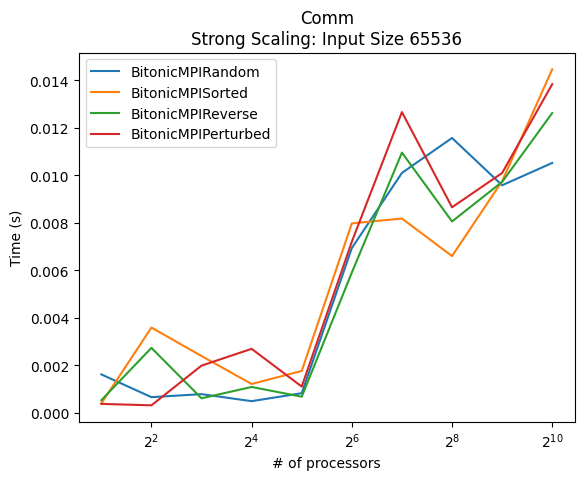

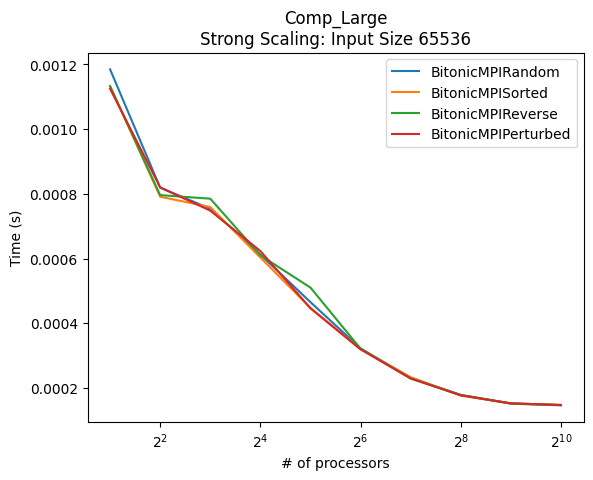

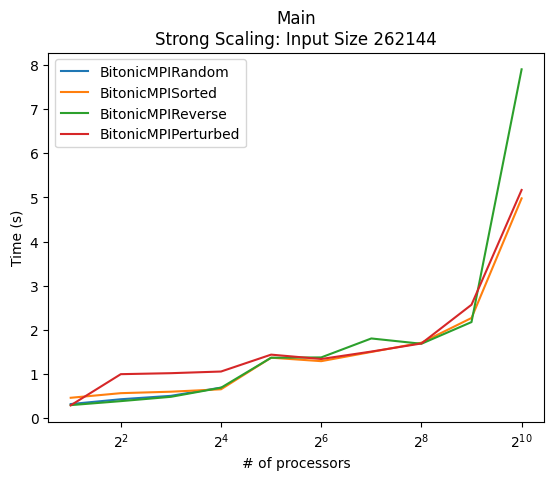

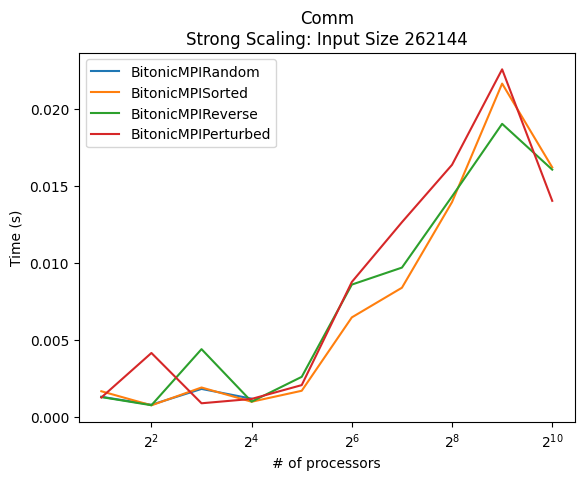

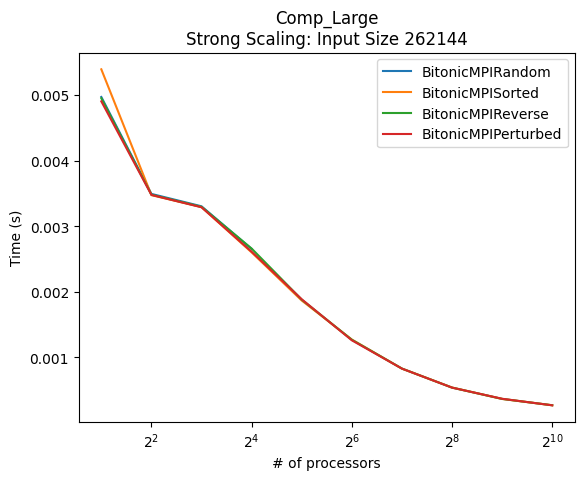

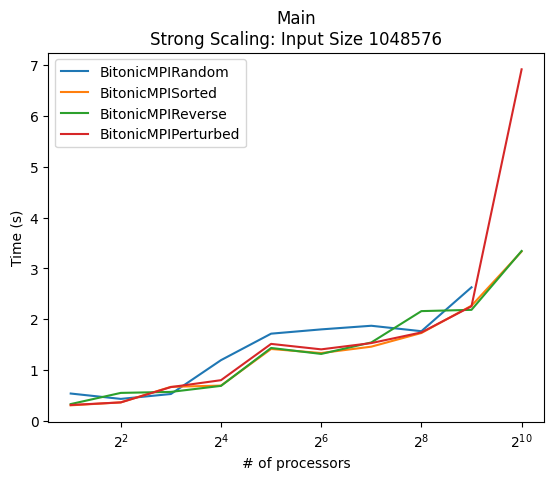

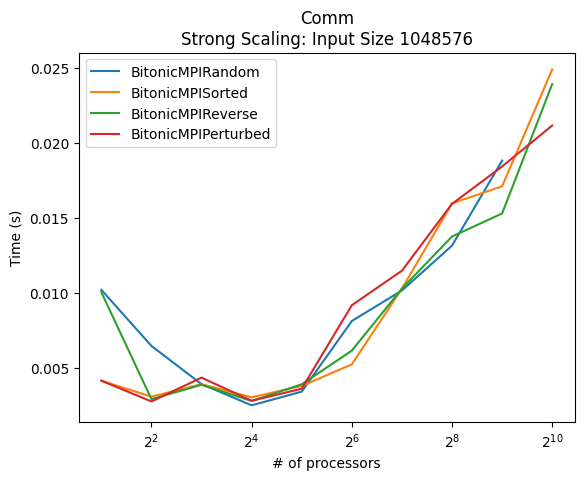

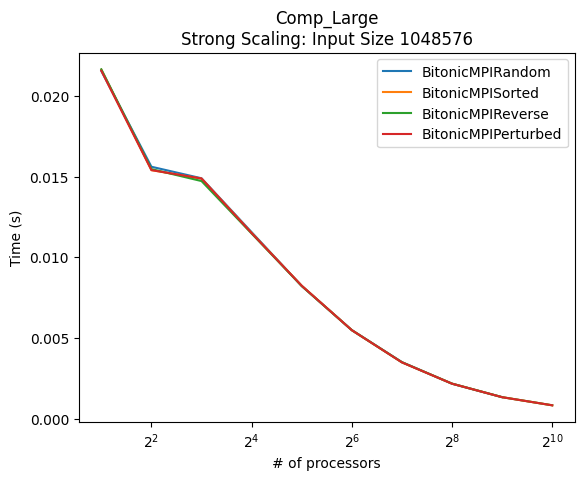

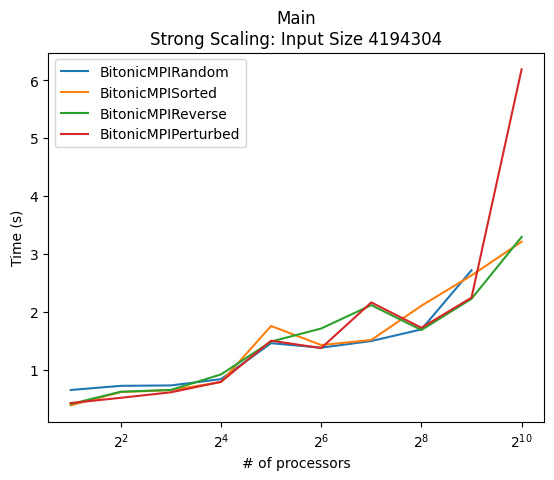

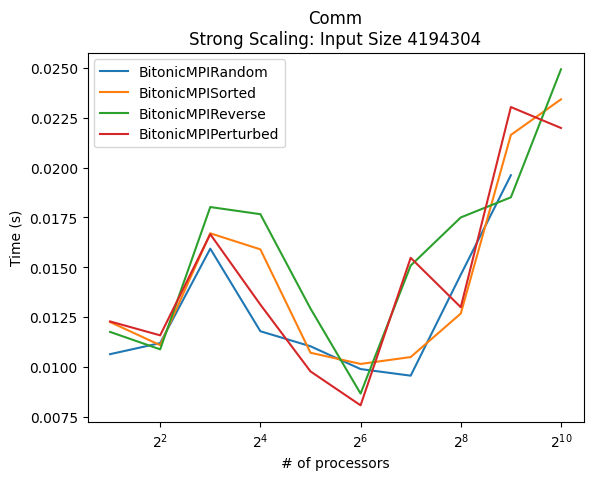

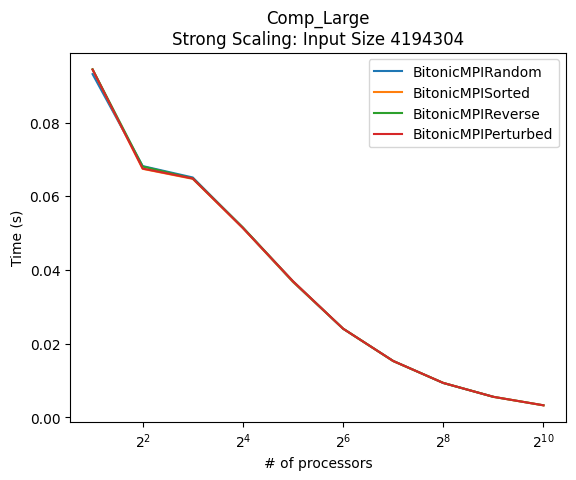

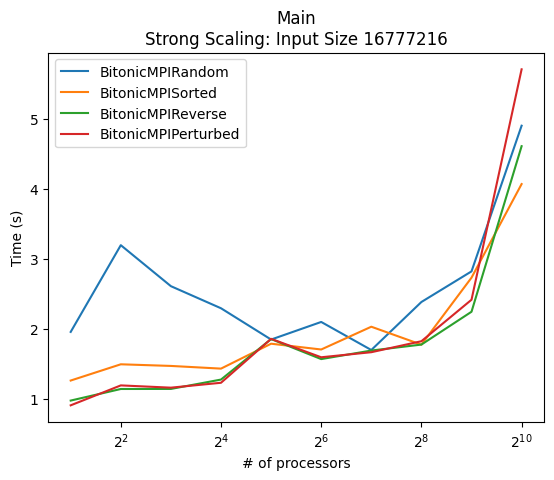

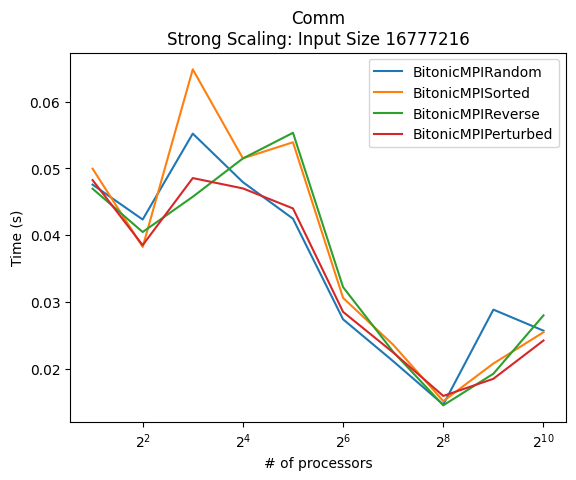

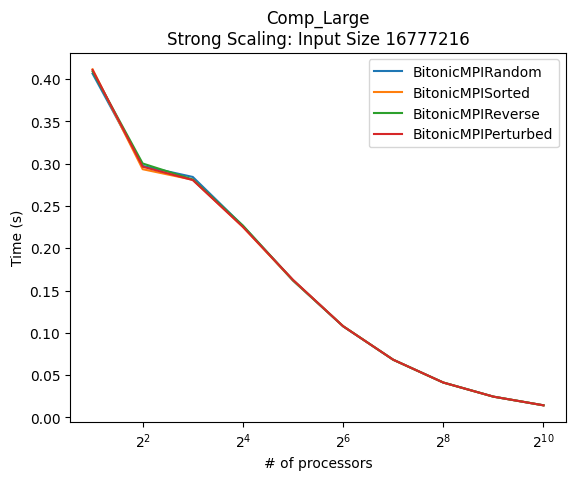

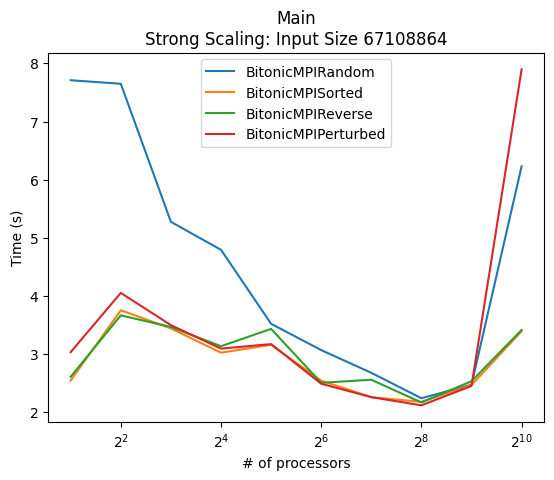

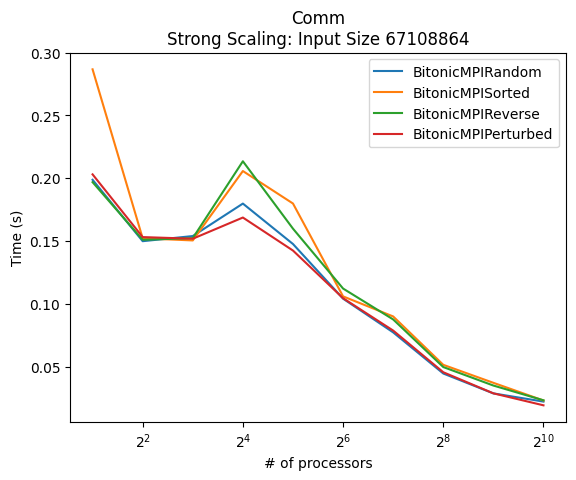

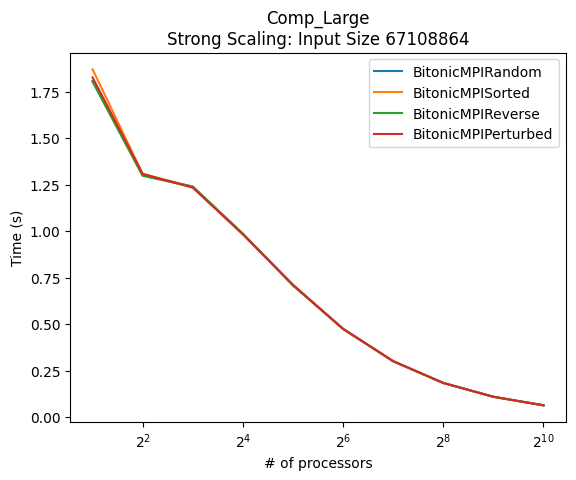

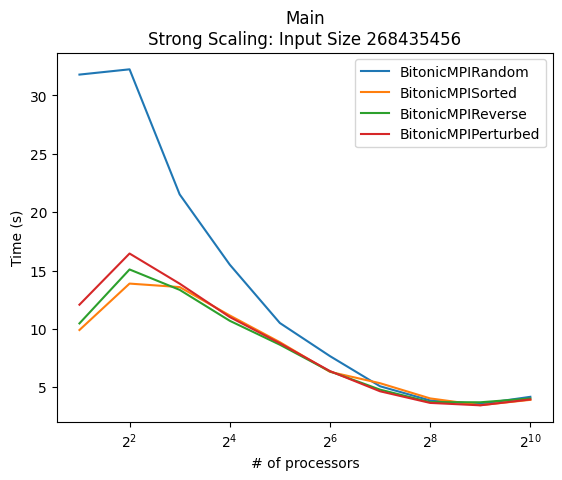

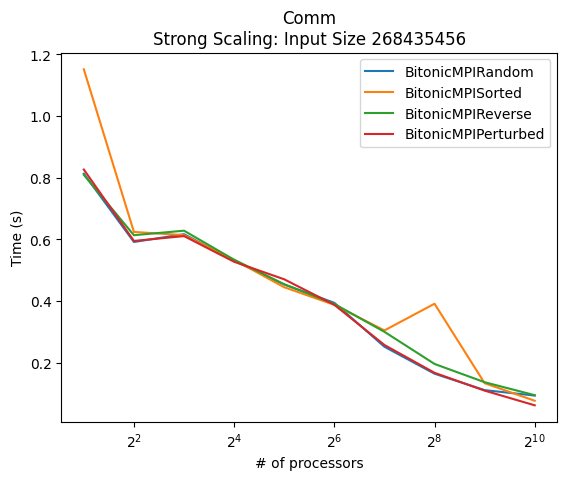

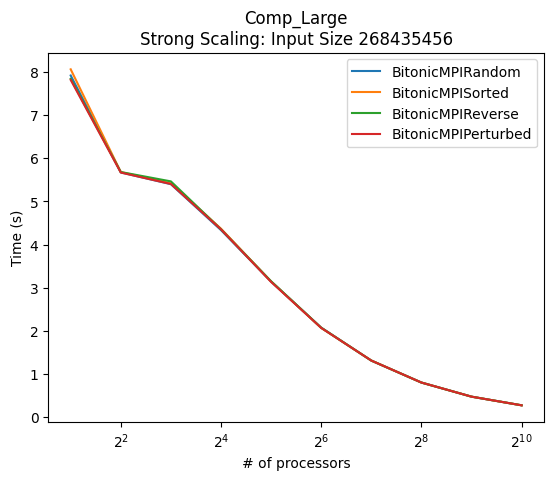

In [26]:
values = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]

for val in values:
    plot_strong_scaling(algosMain, val, 'Avg time/rank', 'Main\nStrong Scaling: Input Size ' + str(val), '# of processors', 'Time (s)')
    plot_strong_scaling(algosComm, val, 'Avg time/rank', 'Comm\nStrong Scaling: Input Size ' + str(val), '# of processors', 'Time (s)')
    plot_strong_scaling(algosComp, val, 'Avg time/rank', 'Comp_Large\nStrong Scaling: Input Size ' + str(val), '# of processors', 'Time (s)')

CUDA

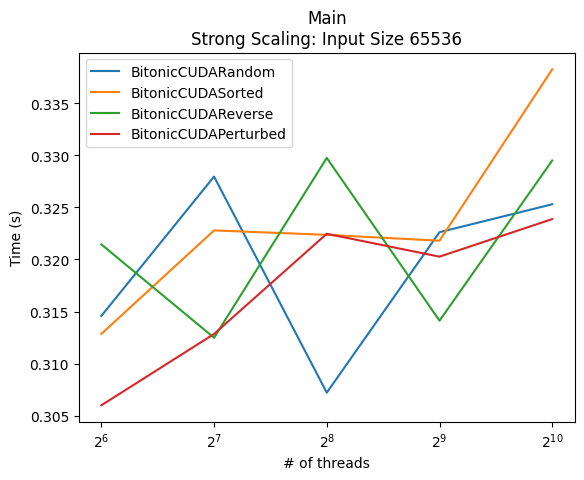

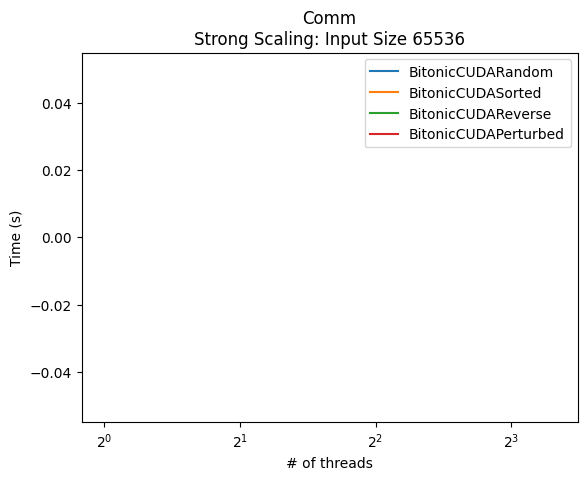

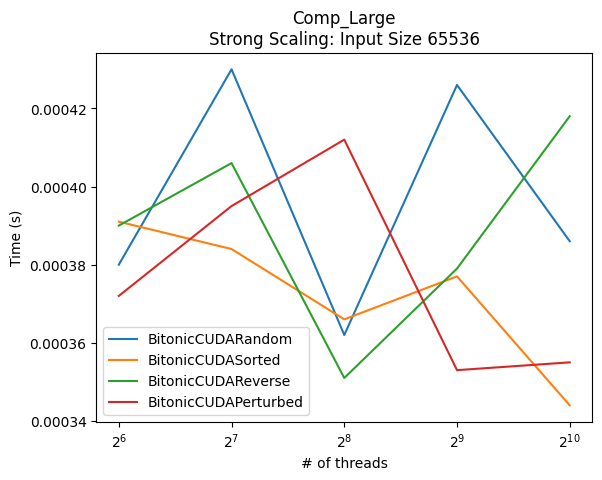

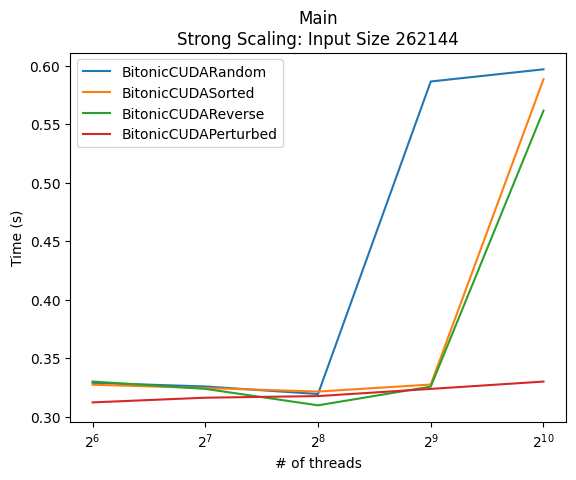

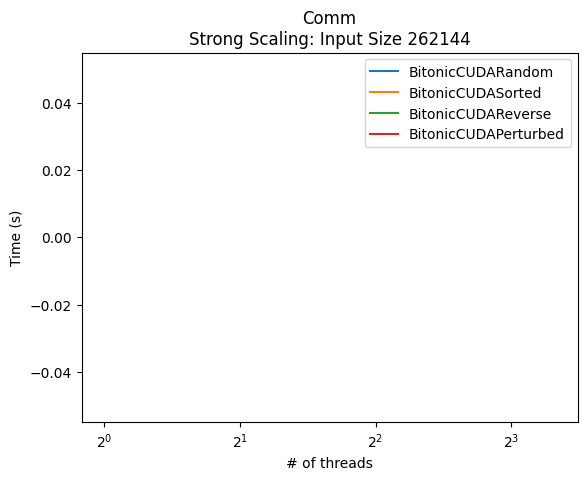

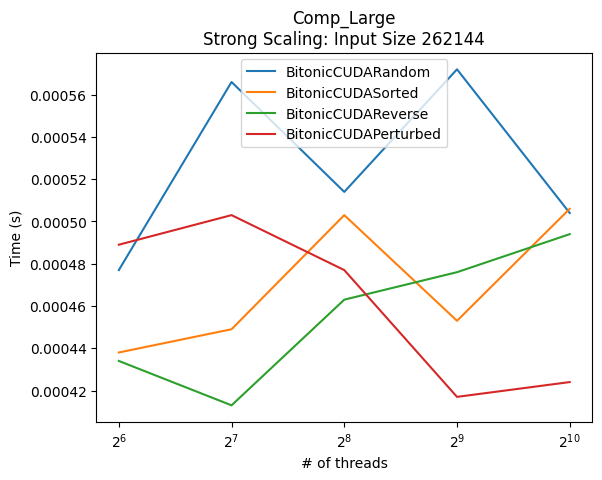

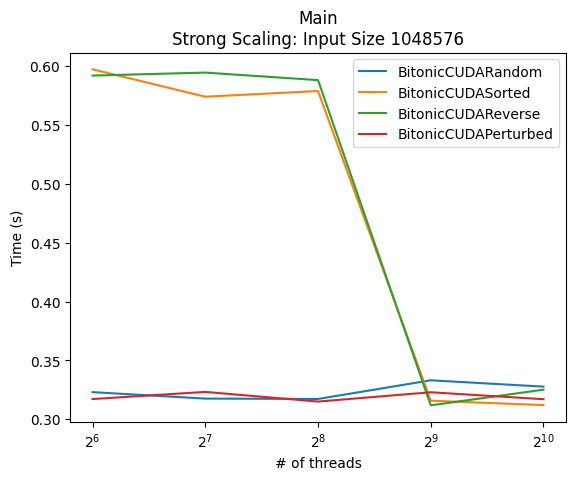

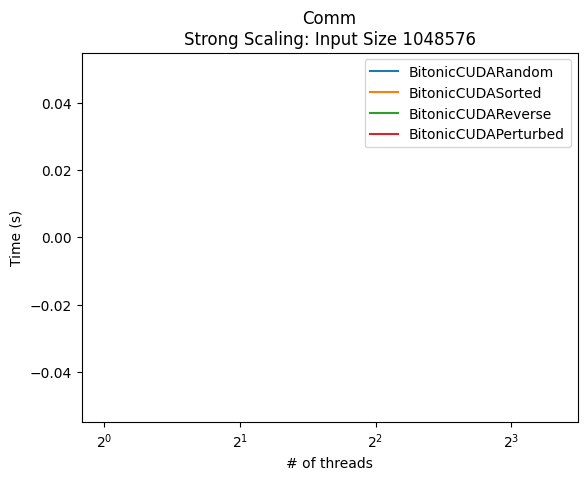

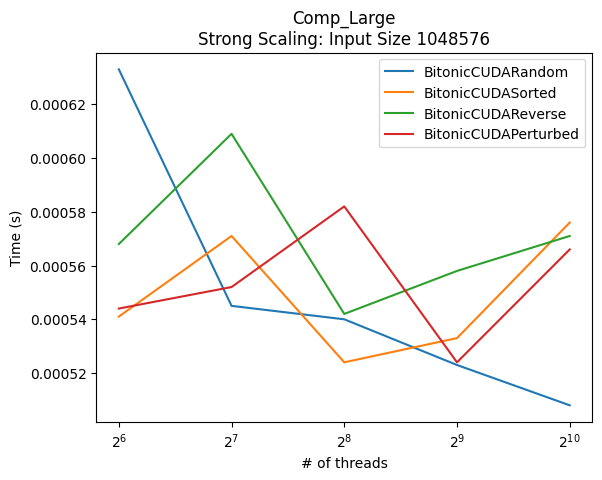

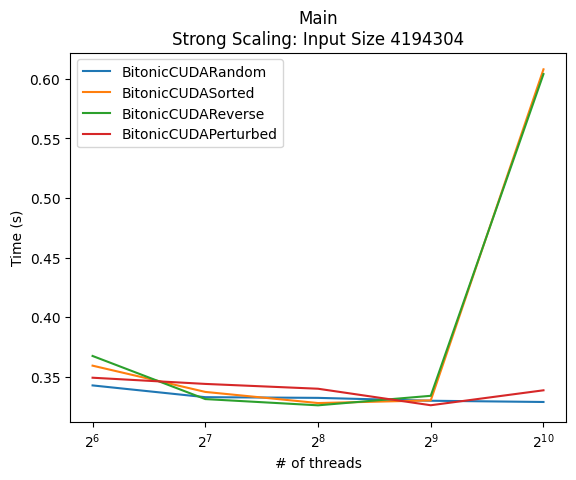

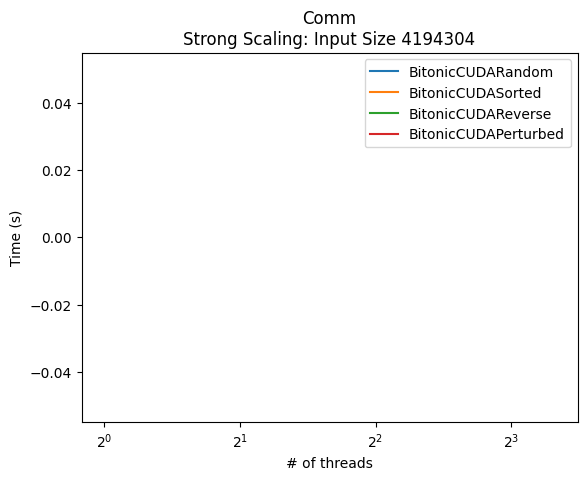

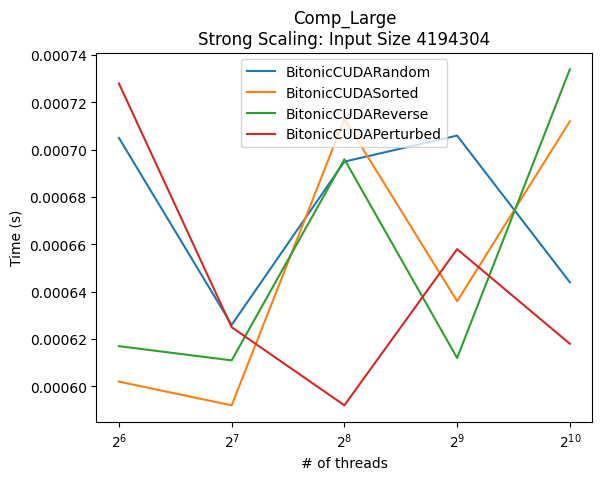

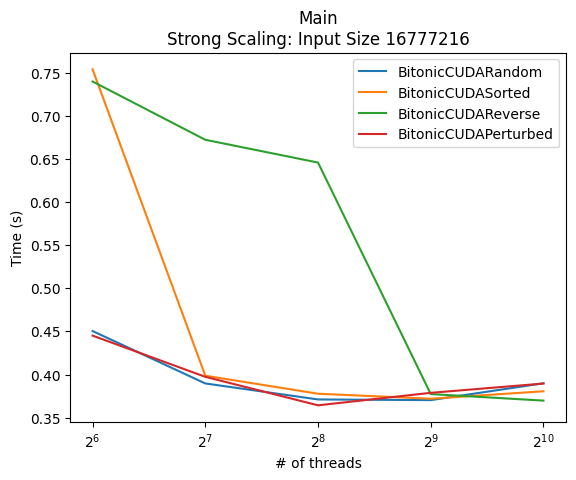

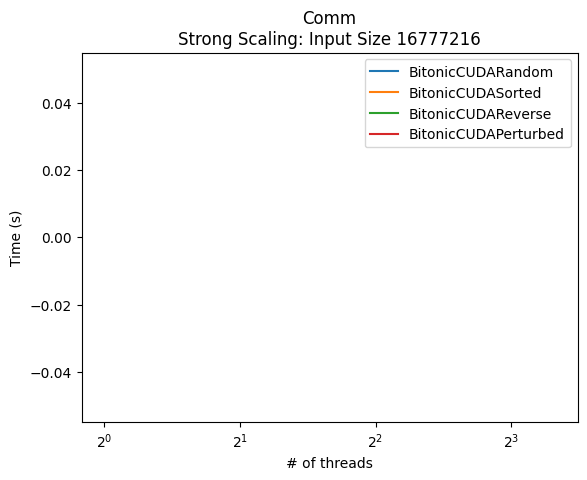

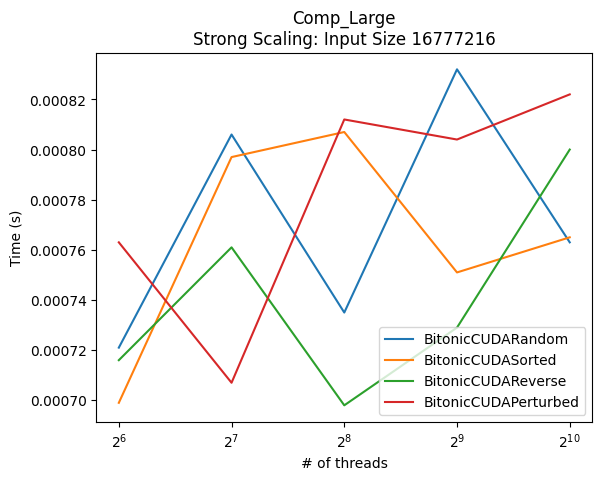

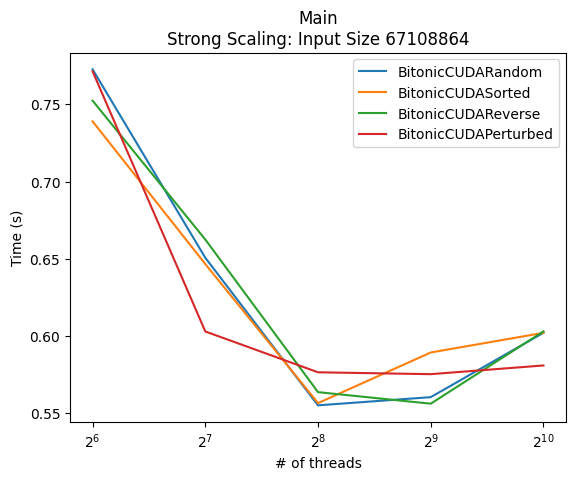

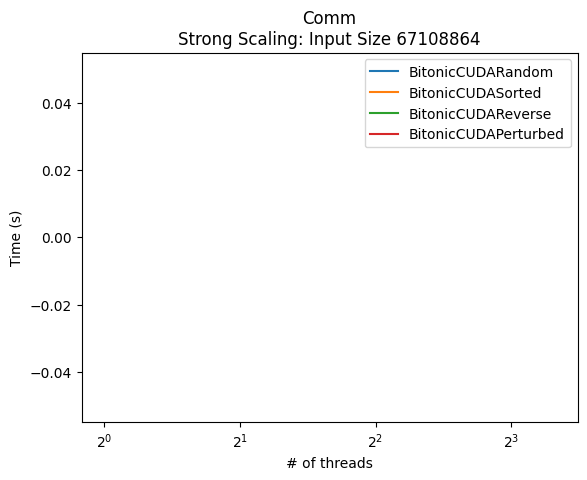

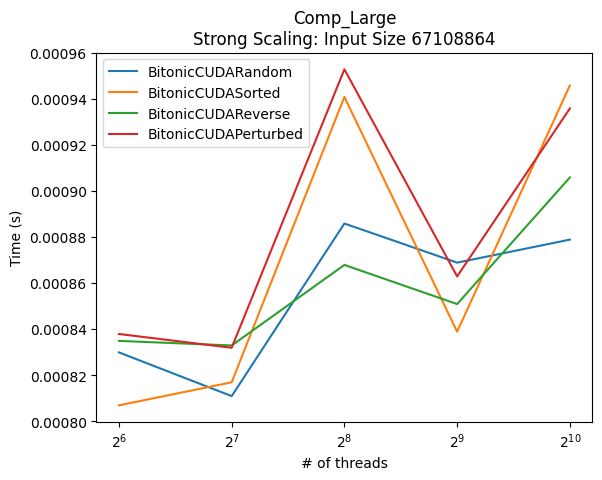

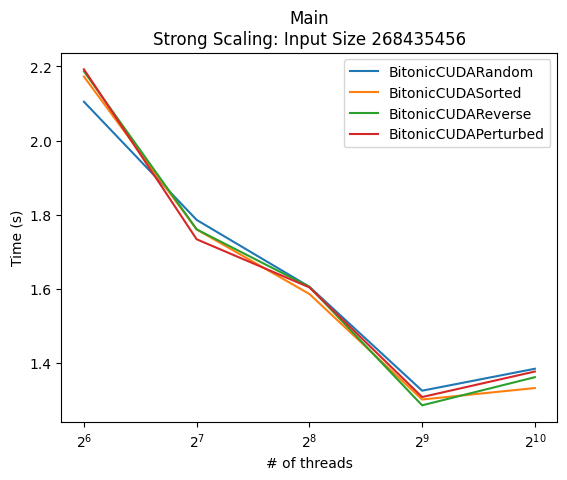

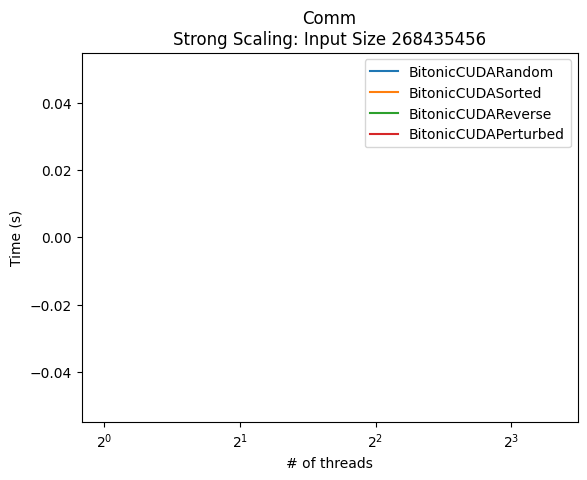

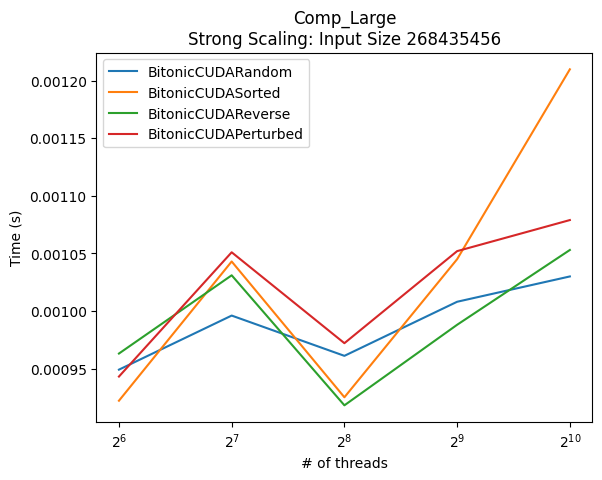

In [27]:
for val in values:
    plot_strong_scaling(algosMainCUDA, val, 'Avg time/rank', 'Main\nStrong Scaling: Input Size ' + str(val), '# of threads', 'Time (s)')
    plot_strong_scaling(algosCommCUDA, val, 'Avg time/rank', 'Comm\nStrong Scaling: Input Size ' + str(val), '# of threads', 'Time (s)')
    plot_strong_scaling(algosCompCUDA, val, 'Avg time/rank', 'Comp_Large\nStrong Scaling: Input Size ' + str(val), '# of threads', 'Time (s)')

Plot strong scaling speedup

In [28]:
def plot_strong_scaling_speedup(algoname, algo, values, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    xvals = algo['num_procs']
    
    for val in values:
        vals_list = list(algo[val][time_type])
        yvals = [vals_list[0] / currVal for currVal in vals_list]
        ax.plot(xvals, yvals, label=str(val))
    
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

MPI

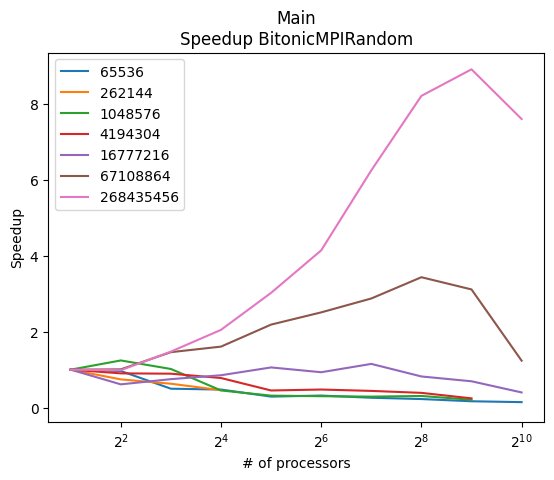

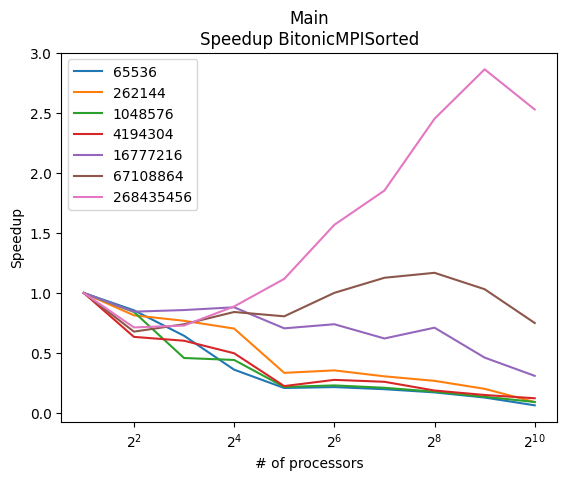

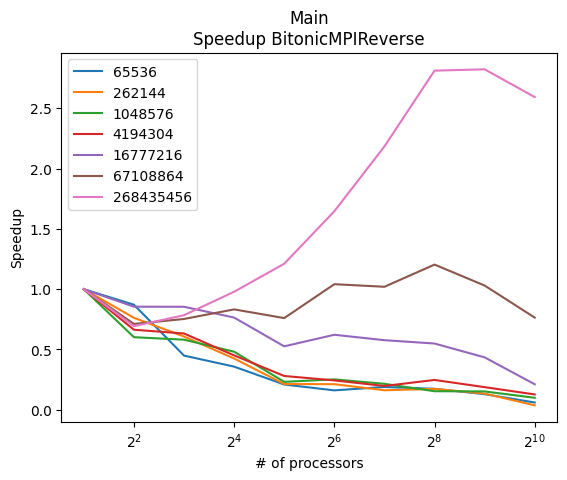

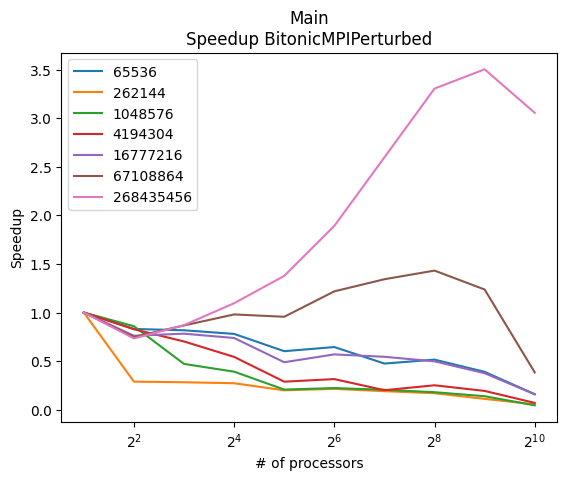

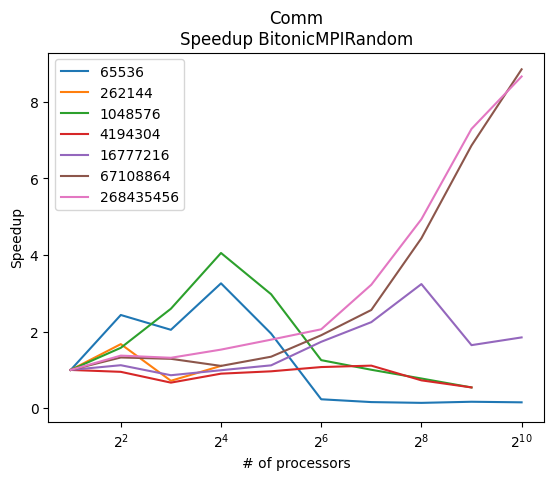

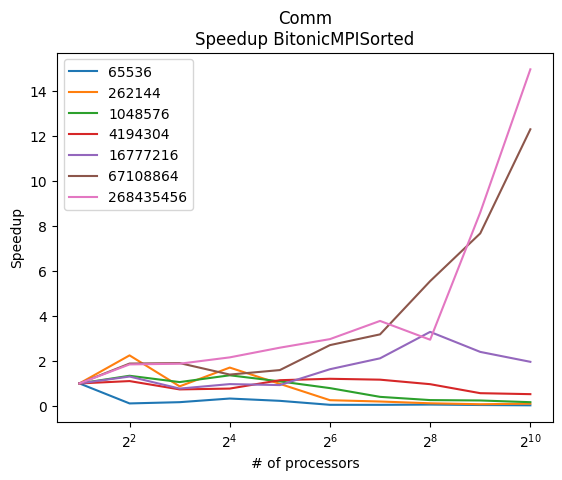

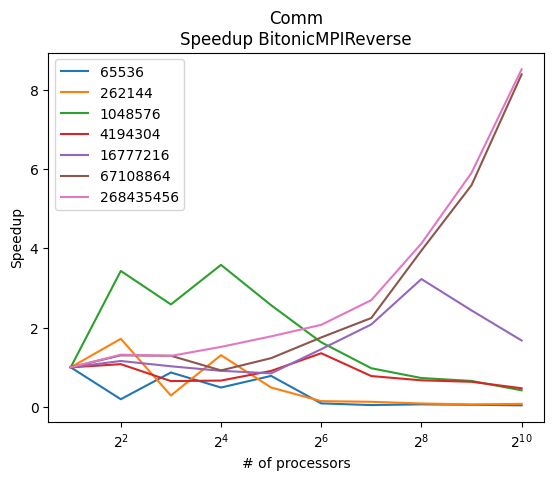

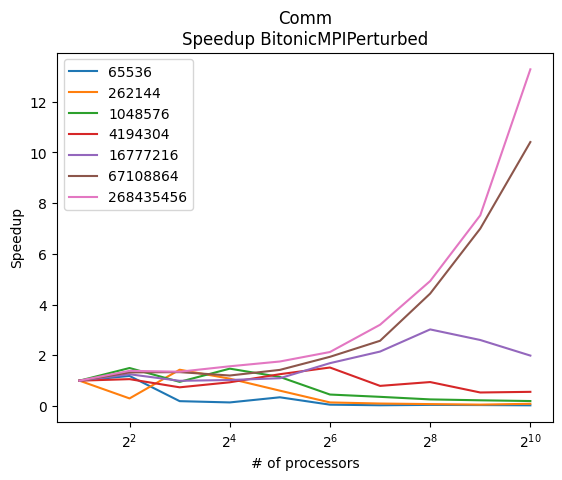

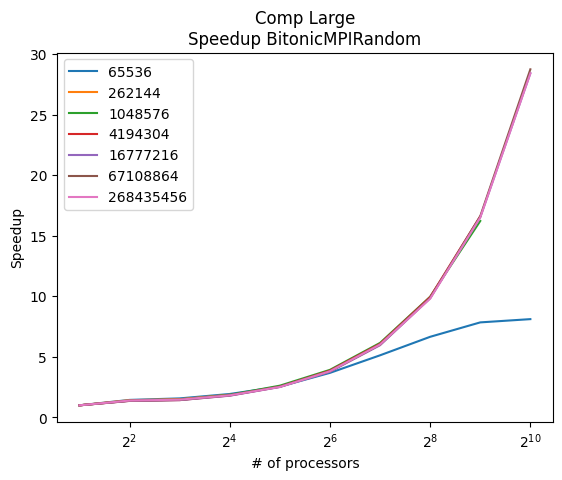

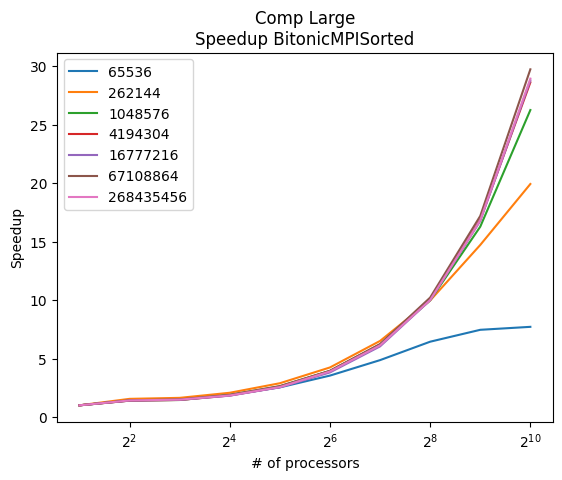

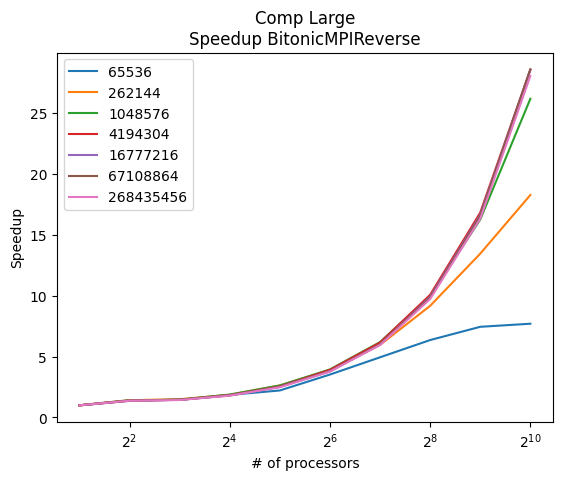

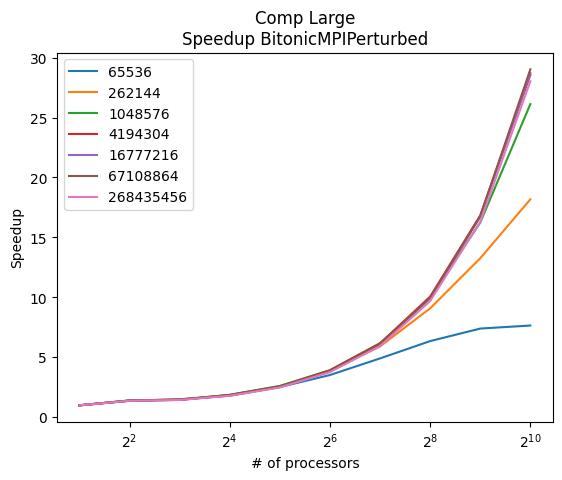

In [29]:
for key in algosMain.keys():
    plot_strong_scaling_speedup(key, algosMain[key], values, 'Avg time/rank', 'Main\nSpeedup ' + key, '# of processors', 'Speedup')
    
for key in algosComm.keys():
    plot_strong_scaling_speedup(key, algosComm[key], values, 'Avg time/rank', 'Comm\nSpeedup ' + key, '# of processors', 'Speedup')
    
for key in algosComp.keys():
    plot_strong_scaling_speedup(key, algosComp[key], values, 'Avg time/rank', 'Comp Large\nSpeedup ' + key, '# of processors', 'Speedup')

CUDA

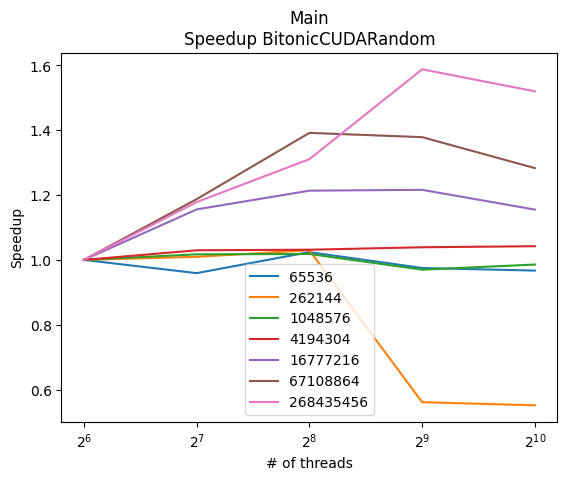

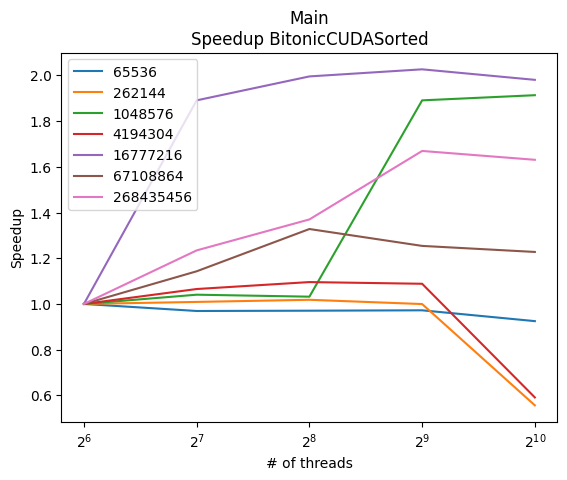

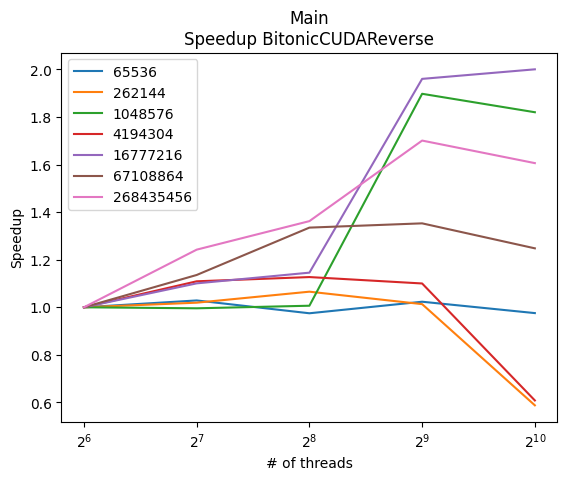

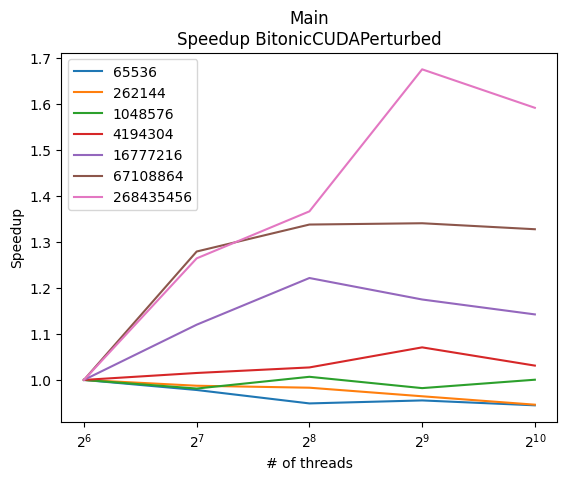

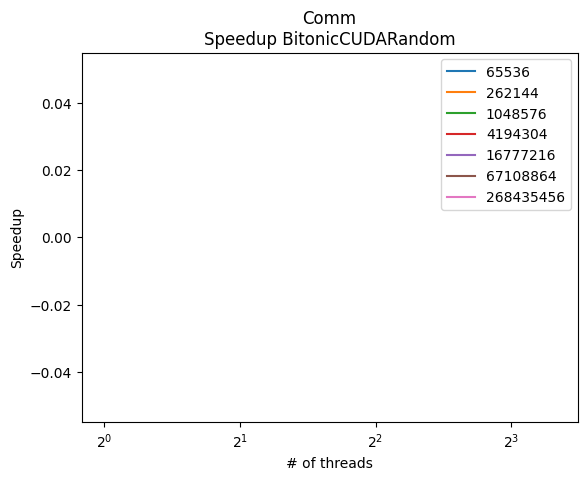

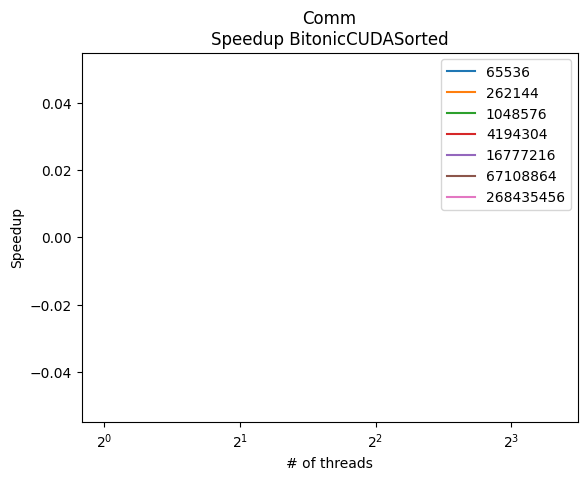

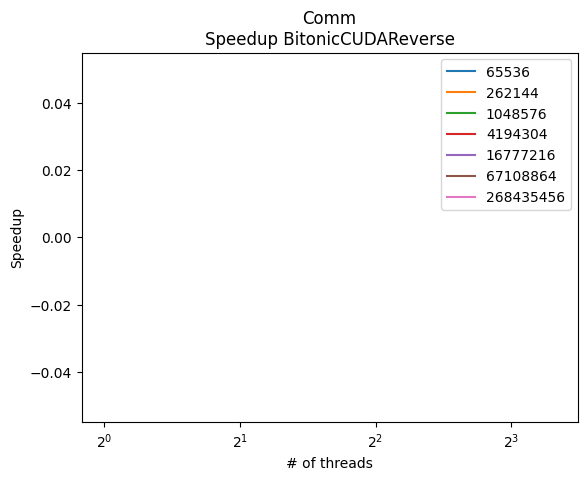

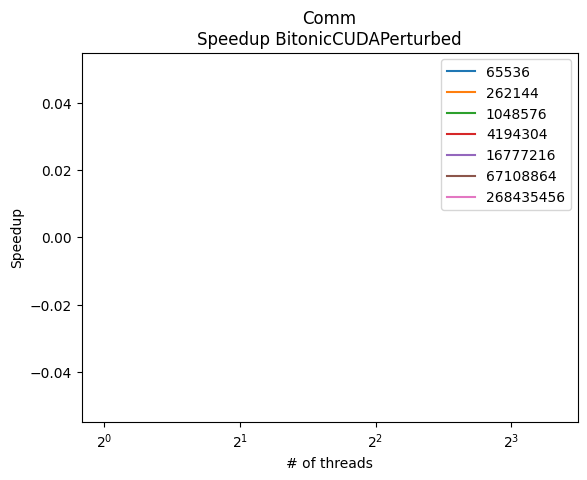

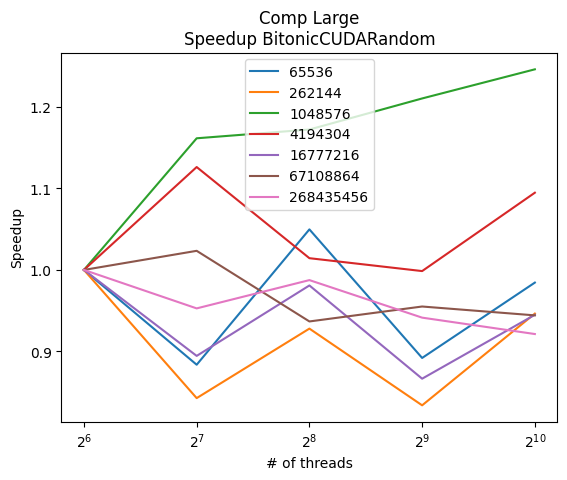

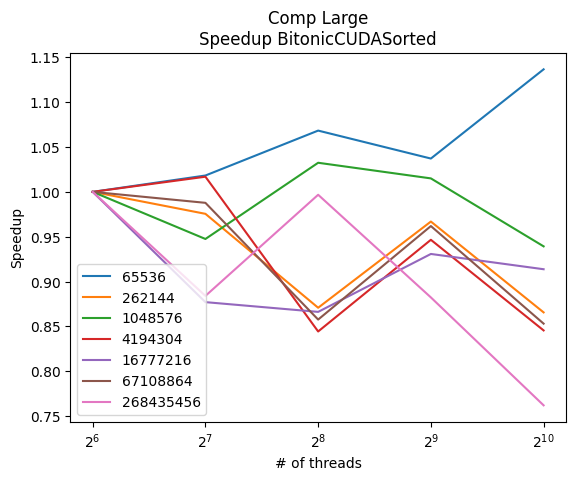

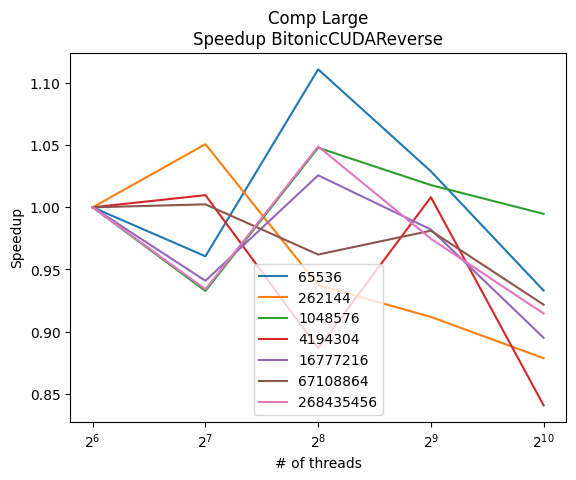

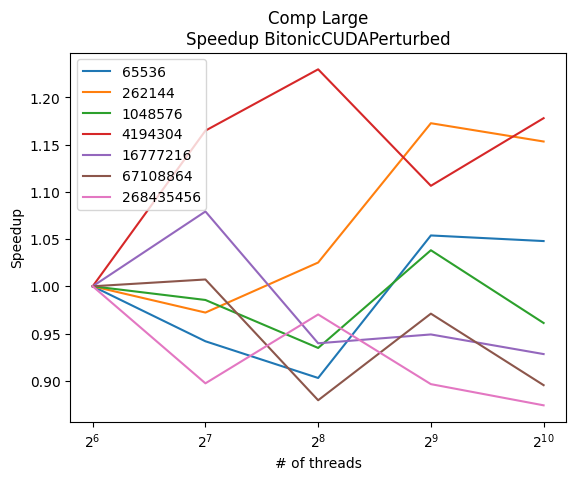

In [30]:
for key in algosMainCUDA.keys():
    plot_strong_scaling_speedup(key, algosMainCUDA[key], values, 'Avg time/rank', 'Main\nSpeedup ' + key, '# of threads', 'Speedup')
    
for key in algosCommCUDA.keys():
    plot_strong_scaling_speedup(key, algosCommCUDA[key], values, 'Avg time/rank', 'Comm\nSpeedup ' + key, '# of threads', 'Speedup')
    
for key in algosCompCUDA.keys():
    plot_strong_scaling_speedup(key, algosCompCUDA[key], values, 'Avg time/rank', 'Comp Large\nSpeedup ' + key, '# of threads', 'Speedup')

Plot weak scaling

In [31]:
def plot_weak_scaling(algoname, algo, values, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    xvals = [2, 8, 32, 128, 512]
    sizePerXVal = [2**20, 2**22, 2**24, 2**26, 2**28]
    yvals = []
    for idx, val in enumerate(sizePerXVal):
        correctNumProcs = algo.loc[algo['num_procs'] == xvals[idx]]
        times = correctNumProcs[val][time_type]
        yvals.append(float(times.iloc[0]))
    
    ax.plot(xvals, yvals, label = algoname)
    
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

def plot_weak_scaling_CUDA(algoname, algo, values, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    xvals = [64, 512, 1024]
    sizePerXVal = [2**24, 2**26, 2**28]
    yvals = []
    for idx, val in enumerate(sizePerXVal):
        correctNumProcs = algo.loc[algo['num_procs'] == xvals[idx]]
        times = correctNumProcs[val][time_type]
        yvals.append(float(times.iloc[0]))
    
    ax.plot(xvals, yvals, label = algoname)
    
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

MPI

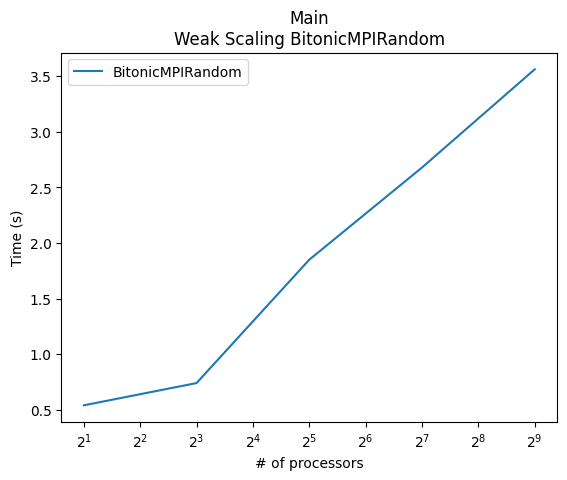

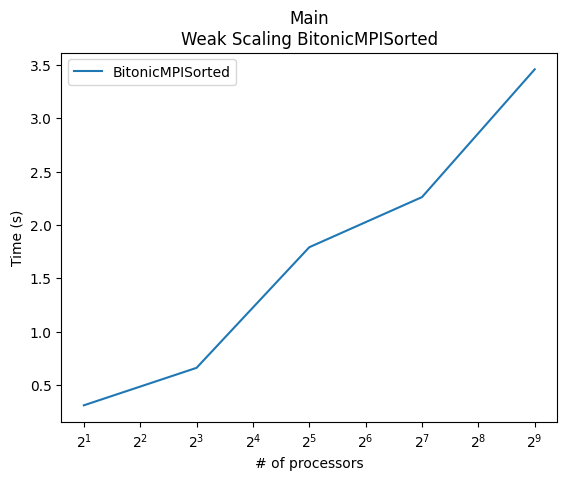

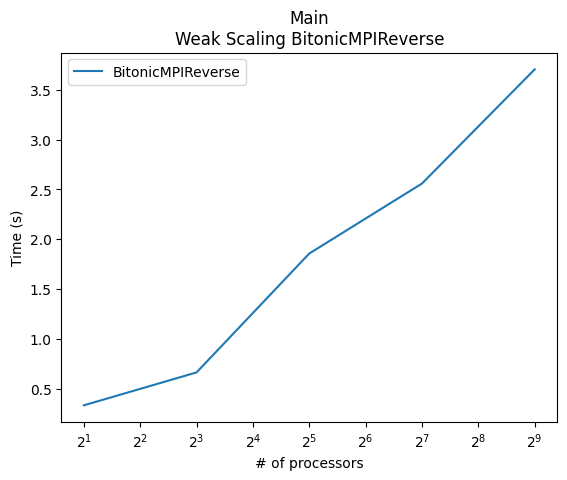

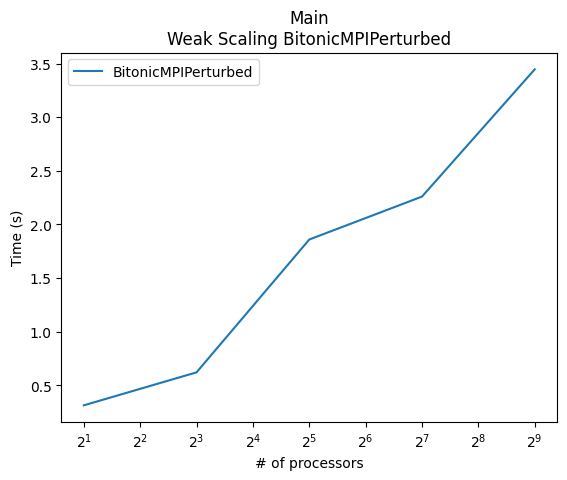

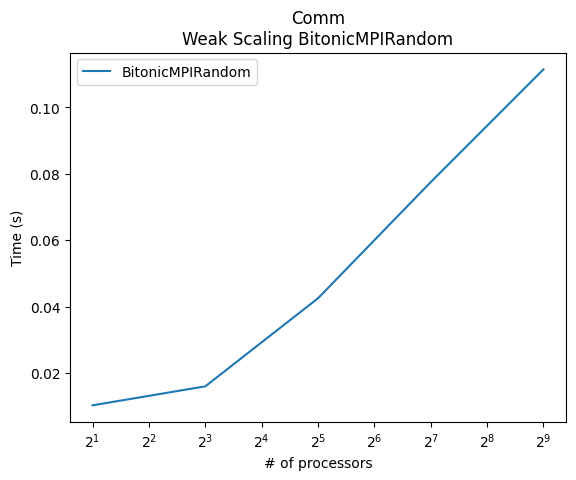

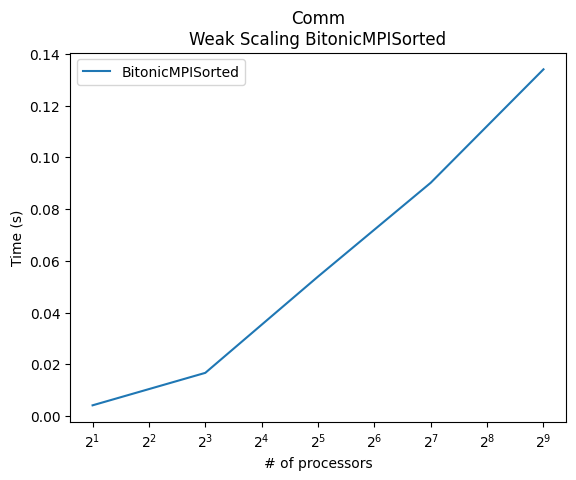

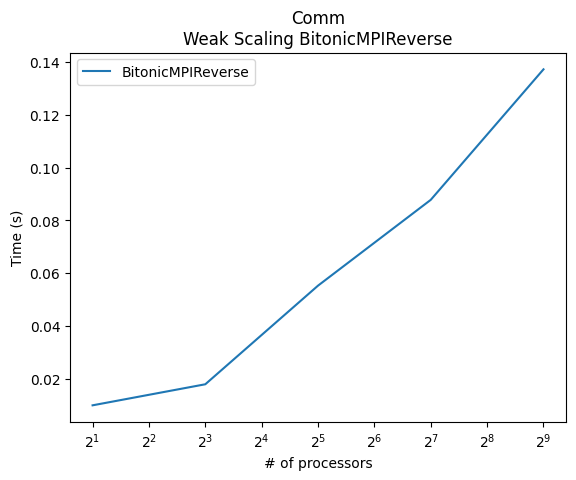

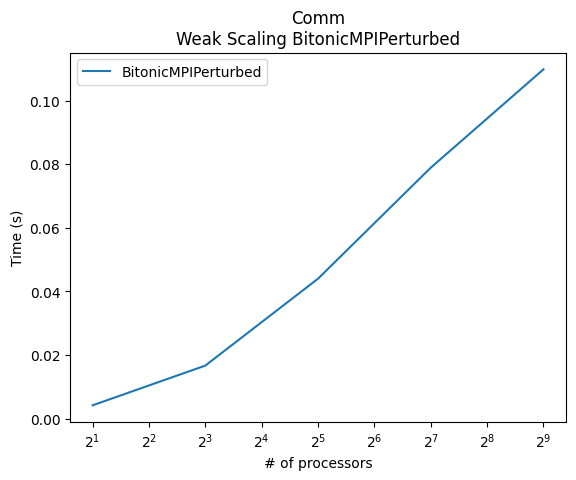

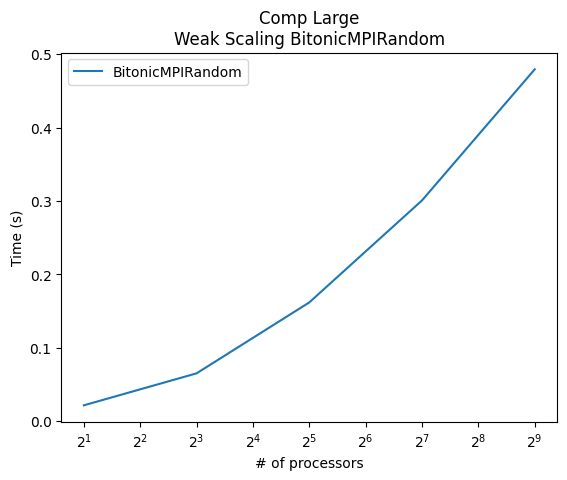

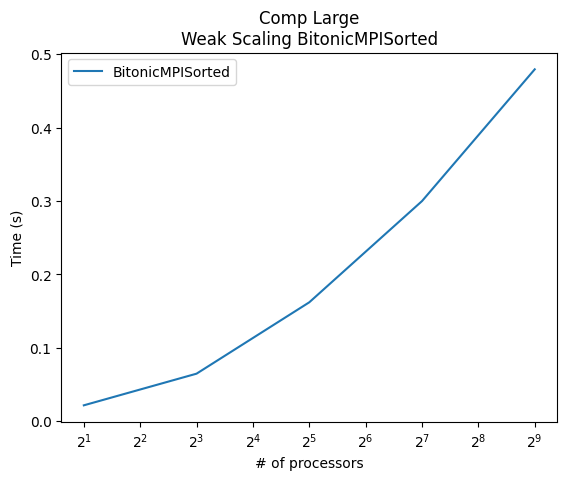

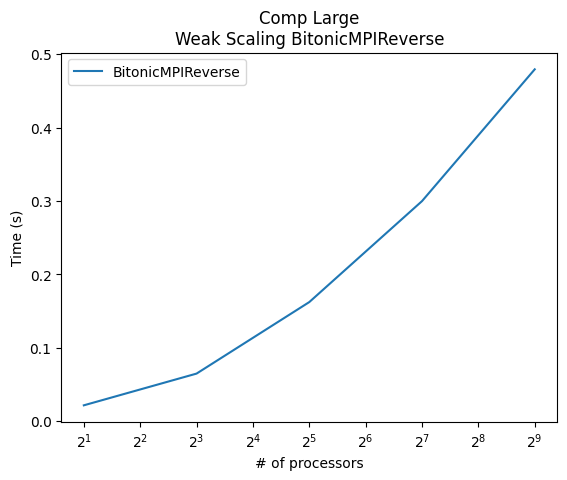

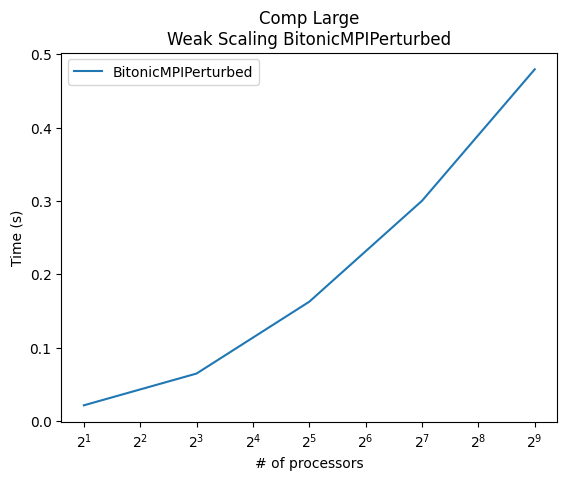

In [32]:
for key in algosMain.keys():
    plot_weak_scaling(key, algosMain[key], values, 'Avg time/rank', 'Main\nWeak Scaling ' + key, '# of processors', 'Time (s)')

for key in algosComm.keys():
    plot_weak_scaling(key, algosComm[key], values, 'Avg time/rank', 'Comm\nWeak Scaling ' + key, '# of processors', 'Time (s)')

for key in algosComp.keys():
    plot_weak_scaling(key, algosComp[key], values, 'Avg time/rank', 'Comp Large\nWeak Scaling ' + key, '# of processors', 'Time (s)')

CUDA

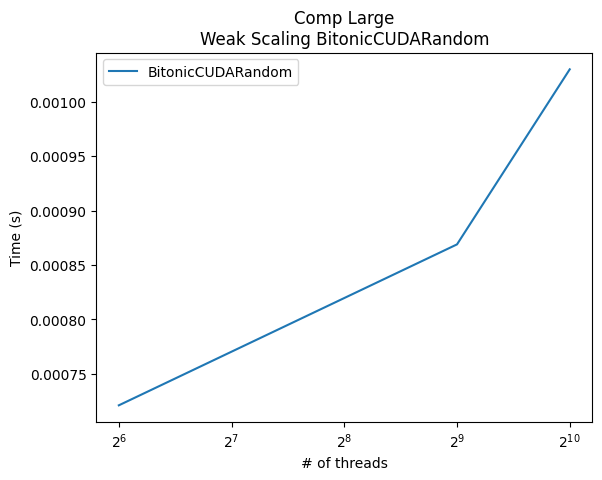

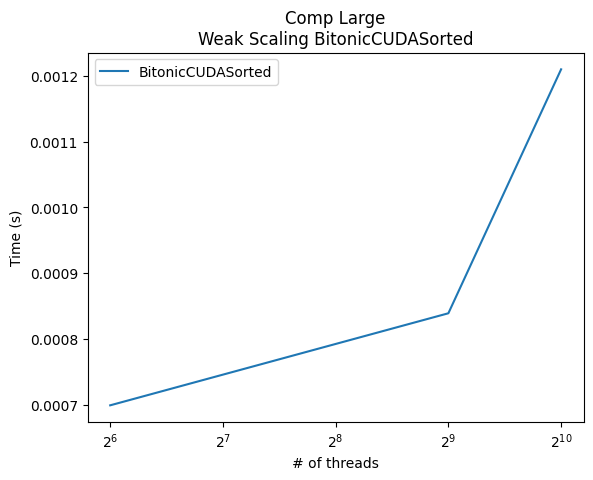

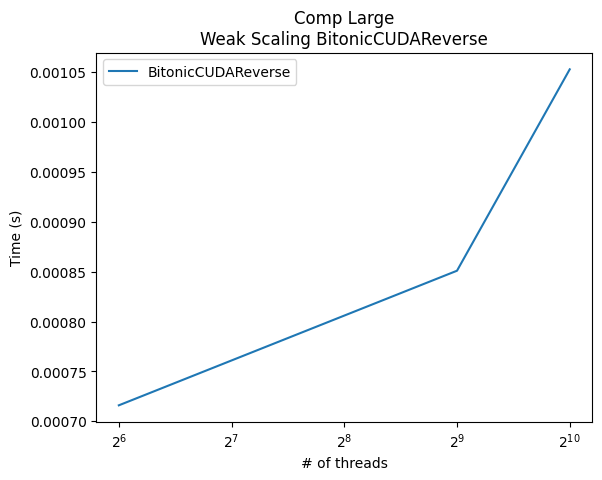

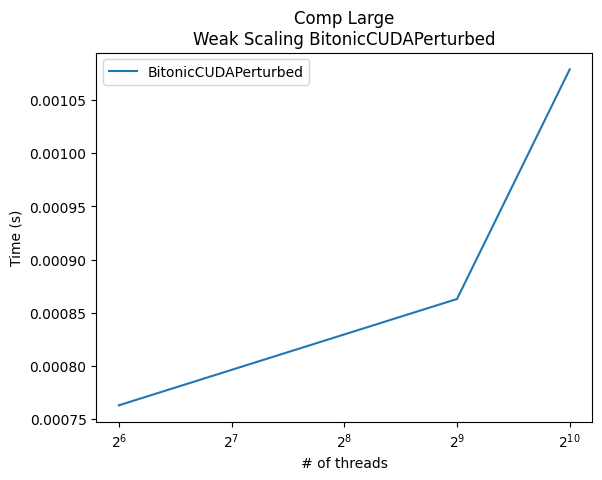

In [36]:
# for key in algosMainCUDA.keys():
#     plot_weak_scaling_CUDA(key, algosMainCUDA[key], values, 'Avg time/rank', 'Main\nWeak Scaling ' + key, '# of threads', 'Time (s)')

# for key in algosCommCUDA.keys():
#     plot_weak_scaling_CUDA(key, algosCommCUDA[key], values, 'Avg time/rank', 'Comm\nWeak Scaling ' + key, '# of threads', 'Time (s)')

for key in algosCompCUDA.keys():
    plot_weak_scaling_CUDA(key, algosCompCUDA[key], values, 'Avg time/rank', 'Comp Large\nWeak Scaling ' + key, '# of threads', 'Time (s)')